Importing all the libraries

In [13]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr, kendalltau
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
nba_df = pd.read_excel('/content/sample_data/NBA_Stats_71_Years.xlsx')

In [18]:
heart_df = pd.read_csv('/content/sample_data/sample_dataheart.csv')

FileNotFoundError: ignored

In [19]:
mcdonald_df =pd.read_csv('/content/sample_datamcdonaldata.csv')

FileNotFoundError: ignored

In [ ]:
supercharge_df = pd.read_csv('/content/sample_data/supercharge.csv', encoding='latin1')

In [ ]:
nba_df.head()

In [ ]:
# Get a summary of the dataset
print(nba_df.info())


In [ ]:
# Check basic statistics of the numeric columns
print(nba_df.describe())

In [ ]:
# Identify columns with missing values
missing_values = nba_df.isnull().sum()
print(missing_values)

In [ ]:
df_nba = nba_df.fillna(nba_df.mean())  # Fill missing values with the mean


In [ ]:
missing_values = df_nba.isnull().sum()
print(missing_values)

For this project, we will be focusing on Points Scored which will be predicting or analyzing the scoring performance of players so the "Points Scored" column could be a suitable target variable. It represents the total number of points a player has scored. But before we do that we will be doing some EDA.

In [ ]:
df_nba.Team.unique()

In [ ]:
# Bar plot
plt.figure(figsize=(10,6))
df_nba.groupby('Player')['Points Scored'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Players by Points Scored')
plt.xlabel('Player')
plt.ylabel('Points Scored')
plt.show()

In [ ]:
# Line plot for NYK
plt.figure(figsize=(10,6))
df_nba[df_nba['Team']=='NYK'].groupby('Season Start Year')['Efficency'].mean().plot(kind='line')
plt.title('Efficiency over time for a specific team')
plt.xlabel('Season Start Year')
plt.ylabel('Efficiency')
plt.show()

In [ ]:
# Scatter plot
plt.figure(figsize=(10,6))
df_nba.plot(kind='scatter', x='Minutes Played', y='Points Scored')
plt.title('Minutes Played vs Points Scored')
plt.xlabel('Minutes Played')
plt.ylabel('Points Scored')
plt.show()


In [ ]:
# Histogram
plt.figure(figsize=(10,6))
df_nba['Points Scored'].hist(bins=30)
plt.title('Distribution of Points Scored')
plt.xlabel('Points Scored')
plt.show()

In [ ]:
# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_nba[['Points Scored', 'Games Played', 'Minutes Played', 'FG Made', 'FG Attempts']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Pie chart
plt.figure(figsize=(10,6))
df_nba.groupby('Team')['Points Scored'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of total points scored by each team')
plt.show()

In [ ]:
# Box plot
plt.figure(figsize=(10,6))
df_nba.boxplot(column='Points Scored')
plt.title('Box plot of Points Scored')
plt.show()

For this project, we will be focusing on Points Scored which will be predicting or analyzing the scoring performance of players so the "Points Scored" column could be a suitable target variable. It represents the total number of points a player has scored.

In [ ]:
df_nba.info()

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Initiate label encoder
le = LabelEncoder()

# Label encoding for high cardinality columns
nba_df['Player'] = le.fit_transform(nba_df['Player'])
nba_df['Team'] = le.fit_transform(nba_df['Team'])

# One-hot encoding for low cardinality columns
onehotencoder = OneHotEncoder(drop='first')  # drop='first' to avoid dummy variable trap

# Perform one-hot encoding and convert it to array
season_type_encoded = onehotencoder.fit_transform(nba_df[['Season Type']]).toarray()

# Get unique values of 'Season Type' except the first one (as drop='first')
column_names = nba_df['Season Type'].unique()[1:]

# Convert to DataFrame
season_type_df = pd.DataFrame(season_type_encoded, columns=column_names)

# Drop original 'Season Type' column and merge the one-hot encoded dataframe
nba_df = nba_df.drop('Season Type', axis=1)
nba_df = pd.concat([nba_df, season_type_df], axis=1)


Perform z-score standardization on the dataset

In [ ]:
nba_df.info()

In [ ]:
nba_df = nba_df.drop('Year',axis=1)

In [ ]:
scaler = StandardScaler()
df_standardized_nba = pd.DataFrame(scaler.fit_transform(nba_df), columns=nba_df.columns)

In [ ]:
pearson_corr = df_standardized_nba.corr()
spearman_corr = df_standardized_nba.corr(method='spearman')
kendall_corr = df_standardized_nba.corr(method='kendall')


In [ ]:
print(pearson_corr)

Performance and Ranking: There are negative correlations between the "Rank" column and several other columns such as "Games Played," "Minutes Played," "FG Made," "FG Attempts," "Points Scored," and "Efficiency." This suggests that as the ranking increases, these performance-related metrics tend to decrease. It indicates that higher-ranked players may have lower game time, fewer field goals made, and lower overall efficiency.

Season and Performance: The "Season Start Year" column has positive correlations with several other columns such as "Games Played," "Minutes Played," "FG Made," "FG Attempts," "Points Scored," and "Efficiency." This suggests that as the years progress, players tend to participate in more games, accumulate more minutes, make more field goals, score more points, and potentially improve their efficiency.

Playoff Performance: The "Playoffs" column shows positive correlations with several columns such as "Rank," "Games Played," "Minutes Played," "FG Made," "FG Attempts," "Points Scored," and "Efficiency." This indicates that players who perform well in terms of games played, minutes played, field goals made, points scored, and efficiency have a higher chance of making it to the playoffs.

Free Throw Shooting: The "FT %" column shows positive correlations with "FT Made" and "FT Attempts." This suggests that as players make more free throws and attempt more free throws, their free throw shooting percentage tends to increase.

In [ ]:
print(spearman_corr)

In [ ]:
print(kendall_corr)

Based on the Kendall correlation matrix, here are a few inferences that can be drawn:

Playoff Performance: There is a positive correlation between "Playoffs" and metrics such as "Rank," "Games Played," "Minutes Played," "FG Made," "FG Attempts," "FT Made," "FT Attempts," and "Points Scored." This suggests that players who rank higher, participate in more games, accumulate more playing minutes, make more field goals and free throws, and score more points are more likely to be part of playoff teams.

Performance Metrics: Several performance-related metrics, such as "FG Made," "FG Attempts," "FT Made," "FT Attempts," "Points Scored," and "Efficency," show positive correlations with each other. This implies that players who have higher field goal and free throw numbers, score more points, and have higher efficiency tend to perform better overall.

Rebounding: Metrics like "Offensive Rebounds," "Defensive Rebounds," and "Rebounds" show positive correlations with each other. This indicates that players who excel in offensive and defensive rebounding also tend to have higher overall rebounding numbers.

Assists and Turnovers: There is a positive correlation between "Assists" and "Turnovers." This suggests that players who have more assists also tend to have more turnovers.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the Pearson correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(pearson_corr, cmap='coolwarm')
plt.title('Pearson Correlation')
plt.show()

# Plot the Spearman correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr, cmap='coolwarm')
plt.title('Spearman Correlation')
plt.show()

# Plot the Kendall correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(kendall_corr, cmap='coolwarm')
plt.title('Kendall Correlation')
plt.show()


Let's look at Heart Dataframe

In [ ]:
heart_df.head()

In [ ]:
heart_df.info()

In [ ]:
heart_df.describe()

In [ ]:
# Identify columns with missing values
missing_values = heart_df.isnull().sum()
print(missing_values)

In [ ]:
import matplotlib.pyplot as plt

heart_df['age'].plot.hist(bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


In [ ]:
import seaborn as sns

sns.countplot(x='sex', data=heart_df)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')
plt.show()


In [ ]:
plt.scatter(heart_df['age'], heart_df['thalach'])
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.title('Age vs Maximum Heart Rate')
plt.show()


In [ ]:
sns.boxplot(x='target', y='thal', data=heart_df)
plt.xlabel('Target')
plt.ylabel('Thal')
plt.title('Distribution of Thal by Target')
plt.show()



In [ ]:
correlation_matrix_pearson = heart_df.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_pearson, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Matrix Heatmap')
plt.show()


In [ ]:
#Spearman corelation
correlation_matrix_spearman = heart_df.corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm')
plt.title('Spearman Correlation Matrix Heatmap')
plt.show()


In [ ]:
correlation_matrix_kendall = heart_df.corr(method='kendall')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_kendall, annot=True, cmap='coolwarm')
plt.title('Kendall Correlation Matrix Heatmap')
plt.show()


In [ ]:
print(correlation_matrix_pearson)

Based on the Pearson correlation coefficients, we can make the following inferences:

Age (in years) has a negative correlation (-0.229) with the target
variable, indicating that older individuals may be more likely to have heart disease.
Sex has a negative correlation (-0.280) with the target variable, suggesting that females may have a lower likelihood of heart disease compared to males.
Chest pain type (cp) has a positive correlation (0.435) with the target variable, indicating that certain types of chest pain may be associated with a higher probability of heart disease.
Maximum heart rate achieved (thalach) has a positive correlation (0.423) with the target variable, suggesting that individuals with higher maximum heart rates may be more likely to have heart disease.
Exercise-induced angina (exang) has a negative correlation (-0.438) with the target variable, indicating that individuals who experience angina during exercise may have a lower likelihood of heart disease.
ST depression induced by exercise relative to rest (oldpeak) has a negative correlation (-0.438) with the target variable, suggesting that a higher degree of ST depression may be associated with a higher probability of heart disease.
The number of major vessels colored by fluoroscopy (ca) has a negative correlation (-0.382) with the target variable, indicating that a higher number of colored vessels may be associated with a lower likelihood of heart disease.
The thalassemia category (thal) has a negative correlation (-0.338) with the target variable, suggesting that certain categories of thalassemia may be associated with a lower probability of heart disease.

Let's look at the mcdonald's Dataframe

In [ ]:
mcdonald_df.head()

In [ ]:
mcdonald_df.info()

In [ ]:
# Convert servesize and calories to numeric
mcdonald_df['servesize'] = pd.to_numeric(mcdonald_df['servesize'], errors='coerce')
mcdonald_df['calories'] = pd.to_numeric(mcdonald_df['calories'], errors='coerce')

# Convert menu to binary
mcdonald_df['menu'] = mcdonald_df['menu'].map({'No': 0, 'Yes': 1})


In [ ]:
mcdonald_df.info()

In [ ]:
# Identify columns with missing values
missing_values = mcdonald_df.isnull().sum()
print(missing_values)

In [ ]:
import numpy as np

# Impute missing values in servesize with mean
mean_servesize = np.mean(mcdonald_df['servesize'])
mcdonald_df['servesize'].fillna(mean_servesize, inplace=True)

# Drop the menu column
mcdonald_df.drop('menu', axis=1, inplace=True)


In [ ]:
mcdonald_df.info()

Performing some EDA on this.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar Chart
# Filter the DataFrame to include only the top 10 items by count
top_10_items = mcdonald_df['item'].value_counts().nlargest(10).index

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.countplot(data=mcdonald_df[mcdonald_df['item'].isin(top_10_items)], x='item')
plt.xticks(rotation=90)
plt.xlabel('Item')
plt.ylabel('Count')
plt.title('Top 10 Most Common Items')
plt.show()

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=mcdonald_df, x='calories', bins=10)
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.title('Distribution of Calories')
plt.show()

# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mcdonald_df, x='servesize', y='calories')
plt.xlabel('Serving Size')
plt.ylabel('Calories')
plt.title('Serving Size vs. Calories')
plt.show()

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=mcdonald_df[['totalfat', 'sugar', 'sodium']])
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Distribution of Total Fat, Sugar, and Sodium')
plt.show()

# Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = mcdonald_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Select the columns to be scaled (excluding non-numeric columns if any)
columns_to_scale = ['servesize', 'calories', 'protien', 'totalfat', 'satfat', 'transfat', 'cholestrol', 'carbs', 'sugar', 'addedsugar', 'sodium']

# Fit the scaler on the selected columns
scaler.fit(mcdonald_df[columns_to_scale])

# Transform the selected columns using the fitted scaler
mcdonald_df[columns_to_scale] = scaler.transform(mcdonald_df[columns_to_scale])


In [ ]:
mcdonald_df.info()

In [ ]:
mcdonald_df.head()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate Pearson correlation matrix
pearson_corr = mcdonald_df.corr(method='pearson')

# Calculate Spearman correlation matrix
spearman_corr = mcdonald_df.corr(method='spearman')

# Calculate Kendall correlation matrix
kendall_corr = mcdonald_df.corr(method='kendall')

# Plot Pearson correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Pearson Correlation Heatmap')
plt.show()

# Plot Spearman correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Spearman Correlation Heatmap')
plt.show()

# Plot Kendall correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(kendall_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Kendall Correlation Heatmap')
plt.show()


In [ ]:
print(pearson_corr)

Based on the correlation matrix, we can make the following inferences:

Calories and macronutrients: There is a strong positive correlation between calories and protein (0.81), total fat (0.87), and saturated fat (0.73). This suggests that items with higher calorie content tend to have higher levels of protein, total fat, and saturated fat.

Cholesterol: Cholesterol shows a moderate positive correlation with protein (0.59), total fat (0.42), and sodium (0.48). This indicates that items with higher cholesterol content also tend to have higher levels of protein, total fat, and sodium.

Carbohydrates and sugar: Carbohydrates exhibit a positive correlation with calories (0.78) and a moderate positive correlation with sugar (0.51) and added sugar (0.46). This implies that items with higher carbohydrate content also tend to have higher levels of calories, sugar, and added sugar.

Sodium: Sodium has a strong positive correlation with protein (0.91), total fat (0.86), and saturated fat (0.61). This suggests that items with higher sodium content also tend to have higher levels of protein, total fat, and saturated fat.

These inferences provide insights into the relationships between different nutritional components in the McDonald's dataset. It is important to note that correlation does not imply causation, and further analysis may be required to establish any causal relationships.

In [ ]:
supercharge_df.head()

In [ ]:
supercharge_df.info()

In [ ]:
!pip install geopandas

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# First, we need to split the GPS coordinates into separate latitude and longitude fields
supercharge_df[['Latitude', 'Longitude']] = supercharge_df['GPS'].str.split(',', expand=True)

# Convert them to float
supercharge_df['Latitude'] = pd.to_numeric(supercharge_df['Latitude'])
supercharge_df['Longitude'] = pd.to_numeric(supercharge_df['Longitude'])

# Create a GeoDataFrame from your DataFrame. The 'points_from_xy' function creates Point objects from the latitude and longitude columns
gdf = gpd.GeoDataFrame(supercharge_df, geometry=gpd.points_from_xy(supercharge_df['Longitude'], supercharge_df['Latitude']))

# Load a basemap
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the data
fig, ax = plt.subplots(figsize=(10,10))
world.plot(ax=ax, color='white', edgecolor='black')
gdf.plot(ax=ax, color='red')
plt.show()



In [ ]:
supercharge_df.info()

In [ ]:
#Bar plot of the number of Superchargers in each country:
plt.figure(figsize=(12, 6))
sns.countplot(data=supercharge_df, x='Country')
plt.title('Number of Superchargers by Country')
plt.xticks(rotation=90) # Rotate labels for better readability if needed
plt.show()

In [ ]:
#Distribution of Supercharger stalls:
plt.figure(figsize=(12, 6))
sns.histplot(data=supercharge_df, x='Stalls', bins=30)
plt.title('Distribution of Supercharger Stalls')
plt.show()


In [ ]:
#Average power output by country (kW):
avg_power = supercharge_df.groupby('Country')['kW'].mean().sort_values(ascending=False)
avg_power.plot(kind='bar', figsize=(12, 6))
plt.title('Average Power Output by Country')
plt.ylabel('Average Power (kW)')
plt.show()


In [ ]:
#Scatter plot of the Supercharger's latitude and longitude (this gives an idea of geographical distribution):
plt.figure(figsize=(12, 6))
sns.scatterplot(data=supercharge_df, x='Longitude', y='Latitude')
plt.title('Geographical Distribution of Superchargers')
plt.show()


In [ ]:
#Number of Superchargers opened each year:
plt.figure(figsize=(12, 6))
sns.countplot(data=supercharge_df, x='Open Date')
plt.title('Number of Superchargers Opened Each Year')
plt.xticks(rotation=90) # Rotate labels for better readability if needed
plt.show()


In [ ]:

from sklearn.preprocessing import LabelEncoder

# Let's first deal with the NaNs for the 'State' and 'Zip' columns
supercharge_df['State'] = supercharge_df['State'].fillna('Unknown')
supercharge_df['Zip'] = supercharge_df['Zip'].fillna('Unknown')

# Convert 'Latitude' and 'Longitude' to integers
supercharge_df['Latitude'] = supercharge_df['Latitude'].astype(int)
supercharge_df['Longitude'] = supercharge_df['Longitude'].astype(int)

# Let's deal with the date now, we'll just take the year as an integer
supercharge_df['Open Date'] = pd.to_datetime(supercharge_df['Open Date']).dt.year

# Fill NaN years with 0
supercharge_df['Open Date'] = supercharge_df['Open Date'].fillna(0).astype(int)

# For the kW column, let's fill NaNs with the average and convert to int
supercharge_df['kW'] = supercharge_df['kW'].fillna(supercharge_df['kW'].mean()).astype(int)

# Drop columns which will not be used
supercharge_df = supercharge_df.drop(['Unnamed: 11', 'GPS'], axis=1)

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to categorical columns
for column in supercharge_df.select_dtypes(include=['object']).columns:
    supercharge_df[column] = le.fit_transform(supercharge_df[column])


In [ ]:
supercharge_df.head()

In [ ]:

# Pearson Correlation
pearson_corr = supercharge_df.corr(method='pearson')
plt.figure(figsize=(12, 12))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation')
plt.show()

# Spearman Correlation
spearman_corr = supercharge_df.corr(method='spearman')
plt.figure(figsize=(12, 12))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm')
plt.title('Spearman Correlation')
plt.show()

# Kendall Correlation
kendall_corr = supercharge_df.corr(method='kendall')
plt.figure(figsize=(12, 12))
sns.heatmap(kendall_corr, annot=True, cmap='coolwarm')
plt.title('Kendall Correlation')
plt.show()


In [ ]:
print(pearson_corr)

Based on the correlation matrix provided, here are a few observations:

'Supercharger' and 'City' have a high positive correlation (0.906). This could suggest that specific Supercharger models are concentrated in certain cities.

'Street Address' and 'Longitude' have a high positive correlation (0.540). This may mean that different streets are related with distinct longitudes.

'Country' and 'Longitude' have a strong negative correlation (-0.754). This could be due to countries being spread across different longitudes.

'Country' and 'Stalls' have a significant positive correlation (0.261). This might indicate that the number of stalls might be higher in some countries compared to others.

'Zip' and 'Stalls' have a moderate negative correlation (-0.171), possibly implying that certain zip code areas have fewer Supercharger stalls.

'Country' and 'Street Address' show a strong negative correlation (-0.468), suggesting that specific street addresses are exclusive to certain countries.

Input Targetted Parameter :Stalls
Minimum threshold for inverse non-correlation:  -0.02507535350583869
Minimum threshold for non-correlation:  0.02507535350583869
1 on 1 Correlation
Supercharger on Stalls
-0.05008950903908482
Street Address on Stalls
-0.11928680609237532
City on Stalls
-0.045022158176758593
State on Stalls
-0.16476908057159814
Zip on Stalls
-0.19861355962833707
Country on Stalls
0.28253096676162504
kW on Stalls
0.09130669477649768
GPS on Stalls
0.2622822566149954
Elev(m) on Stalls
-0.025075353505838924
Open Date on Stalls
0.028971573620613995
Unnamed: 11 on Stalls
nan
Dependencies with respect to targetted parameter
Index(['Supercharger on Stalls'], dtype='object')
-0.05008950903908482
Index(['Supercharger on Stalls', 'Street Address on Stalls'], dtype='object')
-0.11928680609237532
Index(['Street Address on Stalls'], dtype='object')
-0.11928680609237532
Index(['Supercharger on Stalls', 'Street Address on Stalls', 'City on Stalls'], dtype='object')
-0.04502215817675859

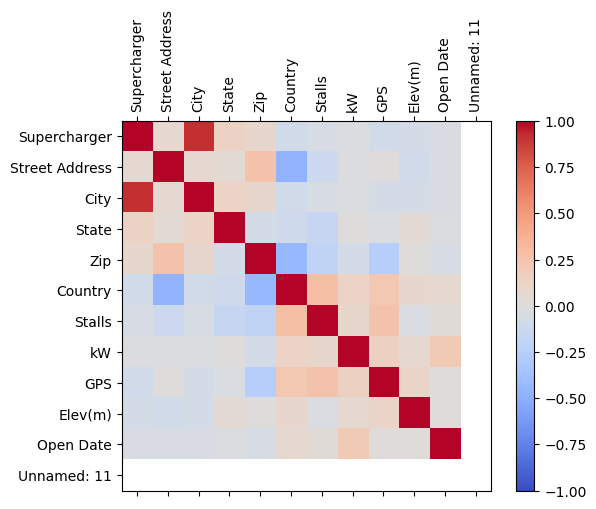

In [4]:
from sqlalchemy import false
from sqlalchemy.sql.expression import true
from sklearn.preprocessing import LabelEncoder

# Ehsan's work
#  Multiple Correlation Coefficient
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

TargettedColumn = input("Input Targetted Parameter :")
data = pd.read_csv('/content/sample_data/supercharge.csv', encoding='latin1')
# pd.read_excel('/content/sample_data/NBA_Stats_71_Years.xlsx')#
# Perform label encoding for each string variable
label_encoder = LabelEncoder()
for var in data.columns:
    data[var] = label_encoder.fit_transform(data[var])

# Calculate the correlation coefficients with other variables
correlation_coefficients = data.corr()[TargettedColumn]

# Find the minimum absolute correlation coefficient excluding the variable itself
min_threshold = correlation_coefficients.drop(TargettedColumn).abs().min()
min_threshold_negative = -min_threshold
# Print the minimum threshold for non-correlation
print("Minimum threshold for inverse non-correlation: ", min_threshold_negative)
print("Minimum threshold for non-correlation: ", min_threshold)

def is_between(a, b, x):
    return min(a, b) < x < max(a, b)

def dependentFeatures (l):
    lists = [[]]
    for i in range(len(l) + 1):
        for j in range(i):
            lists.append(l[j: i])
    return lists


print("1 on 1 Correlation")
for col in data.columns:
  if col != TargettedColumn:
    print(col+" on "+TargettedColumn)
    # Correlation between two columns of DataFrame.
    corr=data[col].corr(data[TargettedColumn])
    print(corr)
    if is_between(min_threshold_negative, min_threshold, corr):
      print("This parameter is not correleated")



parameters = data.columns

index = np.argwhere(parameters==TargettedColumn)
parameter = np.delete(parameters, index)
features = dependentFeatures(parameter)
# print(features)

print("Dependencies with respect to targetted parameter")

for dependent in features:
  if len(dependent) != 0 :
    print(dependent+" on "+TargettedColumn)
    corr = data[[dependent.all()]].corrwith(data[TargettedColumn])
    print(corr[0])
    if is_between(min_threshold_negative, min_threshold, corr[0]):
      print("This feature is not correleated")
    # Add inversely and directly proportionality in percentage





corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()